<a href="https://colab.research.google.com/github/sinhatrishita/super-umbrella/blob/main/Unsupervised_ML_Project_by_Trishita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** -   Unsupervised ML - Netflix Movies and TV Shows Clustering -



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

The unsupervised machine learning project focused on clustering Netflix content aimed to explore and categorize the diverse range of movies and TV shows available on the platform. Leveraging clustering algorithms, such as K-means or hierarchical clustering, the project sought to identify inherent patterns and similarities within content types, illuminating potential viewer preferences and regional content trends. The project aimed to provide actionable insights for content curation, user engagement strategies, and informed decision-making related to regional preferences and content acquisition, ultimately enhancing the overall Netflix viewing experience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statement:**

The project aims to leverage unsupervised machine learning techniques to categorize and cluster the extensive range of content available on Netflix, including movies and TV shows. The primary challenge involves understanding the diverse content landscape and identifying underlying patterns and groupings within the dataset to gain insights into viewer preferences, regional content trends, and genre-based clustering. By conducting this analysis, the project seeks to uncover actionable intelligence for optimizing content curation, enhancing user engagement strategies, and making informed decisions related to regional content preferences and strategic content acquisition.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
df.shape

(7787, 12)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


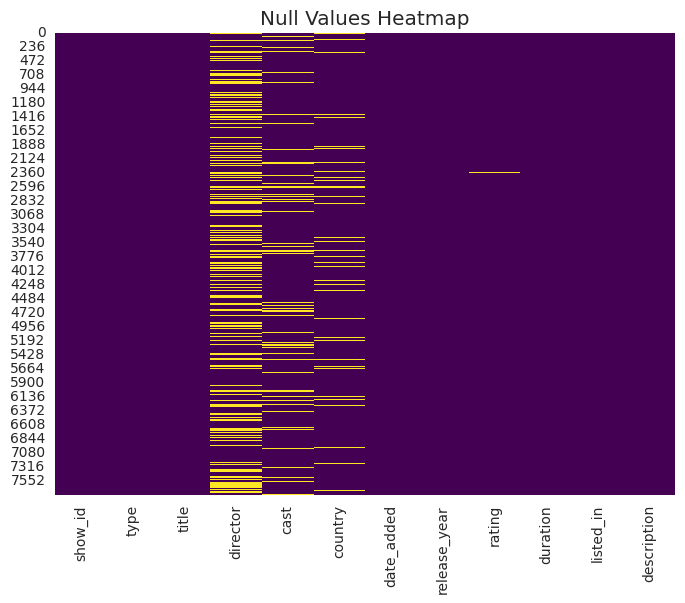

In [ ]:
# let's visualise the null values with a heat map
# Create a heatmap to visualize null values in the DataFrame
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Plot a heatmap of the null values
plt.title('Null Values Heatmap')  # Set the title of the heatmap
plt.show()  # Show the plot

### What did you know about your dataset?

The Netflix dataset consists of 7787 rows and 12 columns, providing details about movies and TV shows available on the platform. This dataset is free from duplicate entries. However, it's important to note that columns such as "director," "cast," "country," and "rating" contain null values, which may require special handling during analysis or data processing.

## ***2. Understanding Your Variables***

### Variables Description

show_id: Unique identifier for each show.

type: Categorization of the content (e.g., movie, TV show).

title: The title of the show or movie.

director: The director(s) of the show or movie.

cast: The actors or performers in the show or movie.

country: The country or countries associated with the show or movie.

date_added: The date the show or movie was added to the platform.

release_year: The year when the show or movie was released.

rating: The rating assigned to the show or movie (e.g., PG-13, TV-MA).

duration: The duration or length of the show or movie.

listed_in: The categories or genres that the show or movie is classified under.

description: A brief summary or description of the show or movie.

### Check Unique Values for each variable.

In [ ]:
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

**Removal of null values**

In [5]:
# let's start with the imputation of the null values in respective columns
# First make a copy of original data set to maintain the integrity
df_copy = df.copy()


There is a date column in the dataset. So for the date column I used forward filling method for null value imputation

In [7]:
# Forward-fill null values in a date column
df_copy['date_added'] = df_copy['date_added'].fillna(method='ffill')

# Now, if you print the dataframe, you will observe that the null values in the date column have been filled using forward-fill
print(df_copy)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

<ipython-input-7-58a8f8680e73>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['date_added'] = df_copy['date_added'].fillna(method='ffill')


**Why I have choosen using most frequent value strategy for imputation of null values?**

The technique of imputing missing values via the most frequent value offers several benefits:

1. **Preservation of Distribution**: Imputing missing values with the most frequent value helps maintain the original distribution of the dataset. This is particularly beneficial when the variable follows a skewed or non-normal distribution, as more advanced imputation methods may skew the distribution.

2. **Robustness to Outliers**: As the imputation approach relies solely on the most frequent value, it is not impacted by outliers within the dataset. It ensures that extreme values do not unduly influence the imputation process.

3. **Ease of Implementation**: This method is straightforward to implement and requires minimal computational resources, making it efficient for large datasets.

4. **Maintains Validity**: Imputing missing values with the most frequent value is a simple and effective way to fill in data gaps, ensuring that the imputed values are valid and representative of the overall dataset.

5. **Useful for Categorical Data**: This imputation method is particularly well-suited for categorical variables, providing a way to handle missing values in a manner that is aligned with the nature of the data.

6. **Reduced Information Loss**: Imputing with the most frequent value helps avoid information loss that might occur with other imputation methods, ensuring that the imputed data reflects the overall trends and patterns within the dataset.

In [8]:
# Let's do the imputation on the other columns as well
# Identify categorical columns to be imputed
categorical_columns = ['director', 'rating', 'cast','country']

# Create a SimpleImputer instance specifying the imputation strategy (e.g., using the most frequent value - "most_frequent")
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the categorical columns within the DataFrame
df_copy[categorical_columns] = imputer.fit_transform(df_copy[categorical_columns])

In [9]:
# Now let's check if there is any null values in the dataset
df_copy.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df_copy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Make a dataframe that describes the content distribution over different countries
content_count_by_country = df_copy.groupby('country')['type'].count().reset_index()

In [ ]:
# Top ten countries with the highest number of content type
top_countries = content_count_by_country.nlargest(10, 'type')

In [ ]:
top_countries

,country,type
549,United States,3062
229,India,923
462,United Kingdom,397
291,Japan,226
394,South Korea,183
51,Canada,177
403,Spain,134
147,France,115
137,Egypt,101
308,Mexico,100


<ipython-input-29-e4cd8102f4e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='type', data=top_countries, palette='viridis')  # Create a bar plot


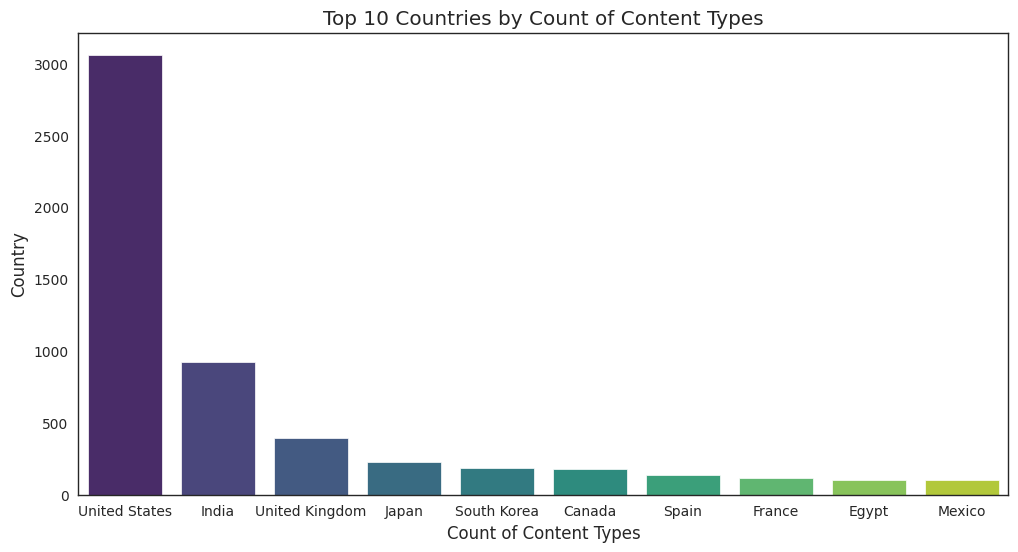

In [ ]:
# Create a bar plot to visualize the count of content types in the top 10 countries
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(x='country', y='type', data=top_countries, palette='viridis')  # Create a bar plot
plt.title('Top 10 Countries by Count of Content Types')  # Set the title of the plot
plt.xlabel('Count of Content Types')  # Set the label for the x-axis
plt.ylabel('Country')  # Set the label for the y-axis
plt.show()  # Show the plot

**why I have made this chart?**



1. **Content Strategy**: The plot helps in understanding the popularity of content types in different countries. This insight can guide decisions relating to content acquisition, production, or licensing to cater to the preferences of local audiences. For instance, if TV shows are more popular than movies in a particular country, the platform might prioritize adding or producing more TV shows for that market.

2. **Localization Efforts**: Understanding content preferences by region can aid in localization efforts. This insight might prompt the platform to focus on adding more localized or culturally relevant content in regions where it is most sought after.

3. **Marketing and Promotion**: Insights from this plot can be used to tailor marketing and promotional campaigns. For example, if a country shows a strong preference for TV shows, marketing efforts can be adjusted to highlight the TV show catalog for that region.

4. **Audience Engagement**: By aligning the content offering with audience preferences, the platform can enhance user engagement and satisfaction. This, in turn, can positively impact user retention and customer satisfaction metrics.

5. **Revenue and Subscriber Growth**: Ultimately, catering to specific content preferences can lead to increased viewership and potentially drive subscription growth, thereby impacting the platform's revenue.

In [ ]:
# Count of TV shows and movies over recent years
content_count_by_year = df_copy.groupby(df_copy['release_year'])['type'].value_counts().unstack()



In [ ]:
# Let's see the recent years stats
recent_years = content_count_by_year.tail(10)

In [ ]:
recent_years

type,Movie,TV Show
release_year,,
2012,158.0,61.0
2013,202.0,65.0
2014,244.0,90.0
2015,382.0,159.0
2016,642.0,240.0
2017,744.0,268.0
2018,734.0,387.0
2019,582.0,414.0
2020,411.0,457.0


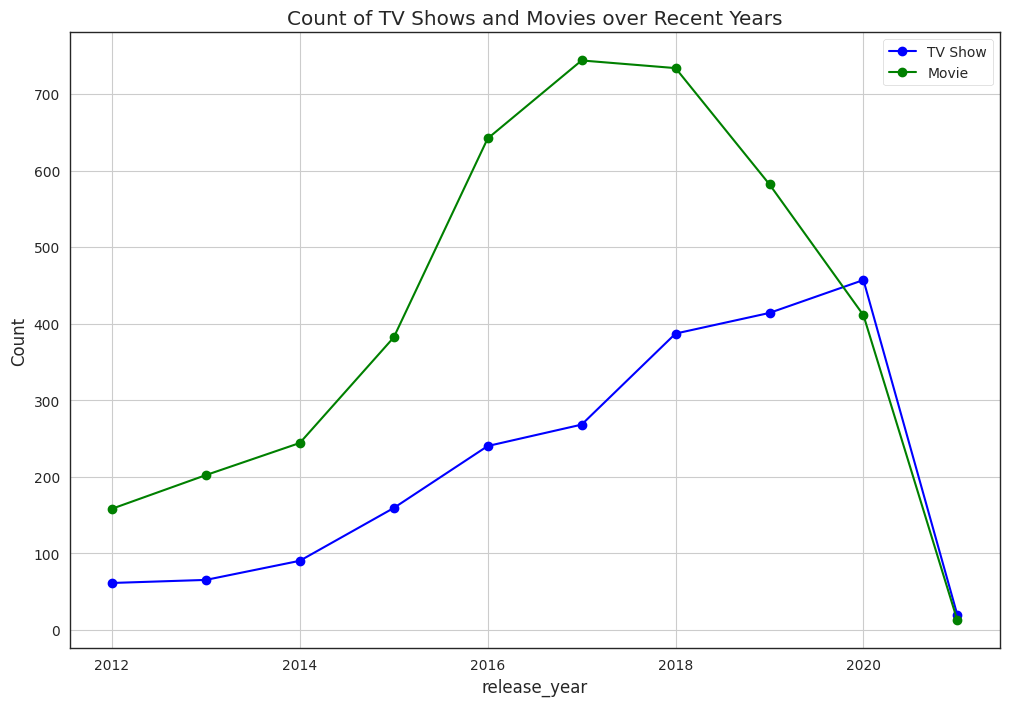

In [ ]:
# Assuming you have created the content_count_by_year DataFrame
plt.figure(figsize=(12, 8))  # Set the size of the plot
plt.plot(recent_years['TV Show'], marker='o', linestyle='-', color='b', label='TV Show')  # Plot TV shows
plt.plot(recent_years['Movie'], marker='o', linestyle='-', color='g', label='Movie')  # Plot movies
plt.title('Count of TV Shows and Movies over Recent Years')  # Set the title of the plot
plt.xlabel('release_year')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.legend()  # Show the legend
plt.grid(True)  # Add grid
plt.show()  # Show the plot

**Why I have choosen this chart?**

Business Impact:

1. **Content Investment**: Understanding the trend in TV shows and movies over recent years can guide content investment decisions. If TV shows have seen a surge in popularity, the platform might prioritize funding and producing more original TV show content, reflecting evolving viewer preferences.

2. **User Acquisition and Retention**: Insights from this chart can be used to tailor user acquisition and retention strategies. For instance, if there is a noticeable uptick in movie releases, marketing efforts could be adjusted to highlight the movie catalog, attracting audiences who favor this content type.

3. **Licensing and Partnerships**: Observing trends in TV shows and movies can inform licensing and partnership decisions. If there is an increasing audience preference for movies, the platform might seek out partnerships or exclusive licensing deals for high-demand movie titles.

4. **Platform Differentiation**: The analysis can also help differentiate the platform from competitors by offering a unique content mix in alignment with current viewer trends. For example, if TV shows are trending, the platform could focus on acquiring exclusive rights to popular TV show franchises.

5. **Revenue Streams**: By adapting the content library to reflect the emerging trends, platforms can drive revenue from advertising, subscriptions, and content sales, potentially boosting profitability.

In [ ]:
# let's see the rating of the content
content_count_by_rating = df_copy.groupby('rating')['type'].count().reset_index()

In [ ]:
# Sort the dataframe by rating count in descending order
top_five_rating = content_count_by_rating.sort_values(by='type', ascending=False).head(5)

# Display the top five content by rating count
print(top_five_rating)

  rating  type
8  TV-MA  2863
6  TV-14  1931
9  TV-PG   806
5      R   665
4  PG-13   386


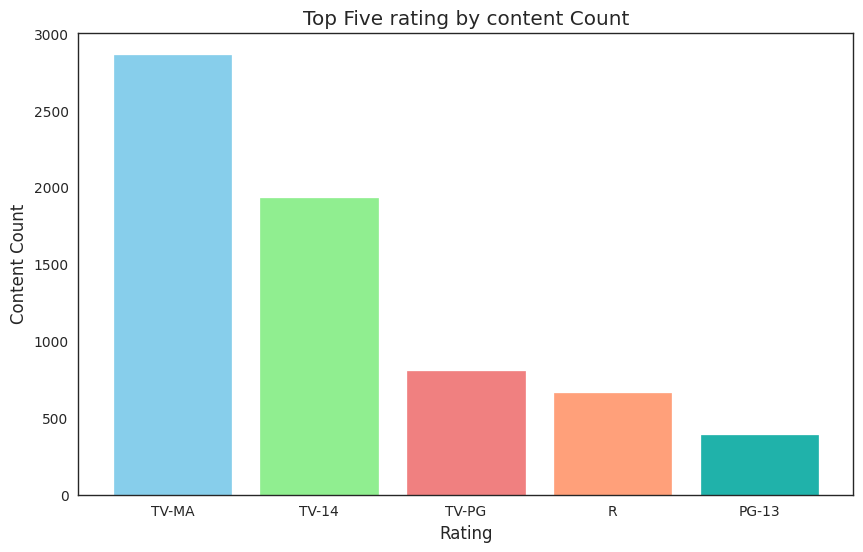

In [ ]:

# Define colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']

# Create a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))  # Set the figure size

bars = plt.bar(top_five_rating['rating'], top_five_rating['type'], color=colors)

# Add title and labels
plt.title('Top Five rating by content Count')
plt.xlabel('Rating')
plt.ylabel('Content Count')

# Customizing the colors
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Show the plot
plt.show()

This chart showcasing the top five content by rating count has an important impact on business for several reasons:

1. **Strategic Decision-Making**: By visualizing the top-performing content, business stakeholders can make informed decisions about future content acquisition, production, or investment, focusing on the types of content that resonate most with their audience.

2. **Revenue Optimization**: Identifying top-rated content helps in optimizing revenue streams. It allows the business to prioritize and allocate resources effectively, capitalizing on high-performing content to drive subscriptions, viewership, or sales.

3. **Content Planning**: Insights from the chart can guide content planning and programming decisions, enabling the business to curate a well-balanced and engaging content library that aligns with audience preferences.

4. **Marketing Strategies**: Understanding the popularity of specific content types can inform marketing strategies, leading to targeted promotional efforts and improved customer engagement.

5. **Competitive Advantage**: Recognizing the top-performing content provides a competitive advantage, allowing businesses to differentiate their offerings and gain an edge in the market by honing in on content that resonates with their audience.

6. **Evaluating Investment**: The visualization helps in evaluating the return on investment for different types of content, aiding in better resource allocation and future investment decisions.

In summary, visualizing the top content by rating count is crucial for strategic, financial, and operational decision-making, providing actionable insights that can drive the business forward and enhance its position in the market.

In [ ]:
# Group by 'director' and count the occurrences of 'type' for each director
director_df = df_copy.groupby('director')['type'].count().reset_index().rename(columns={'type': 'content_count'})

# Get the top five directors based on content count
top_five_directors = director_df.nlargest(5, 'content_count')

# Display the top five directors
print(top_five_directors)

                    director  content_count
3078  Raúl Campos, Jan Suter             18
2321            Marcus Raboy             16
1607               Jay Karas             14
624      Cathy Garcia-Molina             13
1604             Jay Chapman             12


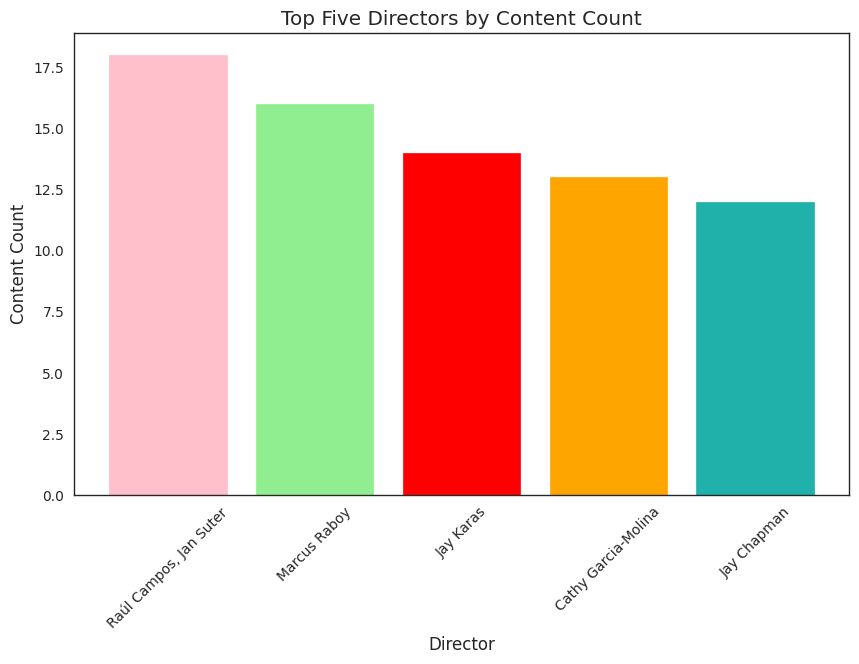

In [ ]:


# Define colors for each bar
colors = ['pink', 'lightgreen', 'red', 'orange', 'lightseagreen']

# Create a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))  # Set the figure size

bars = plt.bar(top_five_directors['director'], top_five_directors['content_count'], color=colors)

# Add title and labels
plt.title('Top Five Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Content Count')

# Rotate x-labels for better readability (if needed)
plt.xticks(rotation=45)

# Customizing the bar colors
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Show the plot
plt.show()

The visualization of the top directors based on content count can have several positive impacts on a business:

1. **Efficient Resource Allocation**: Businesses can identify top-performing directors, enabling them to allocate resources effectively by investing in projects led by these directors, potentially increasing the likelihood of producing successful content.

2. **Strategic Partnerships**: Visualization highlighting top directors can help in forming strategic partnerships with accomplished directors, leading to potential collaborations, exclusive content, and long-term relationships that benefit the business.

3. **Content Planning**: Insights from the chart can guide content planning and programming decisions, enabling the business to understand which directors are driving the most content and tailor future content acquisition or production strategies accordingly.

4. **Marketing and Promotion**: The identification of successful directors can influence marketing strategies, leading to targeted promotions surrounding content associated with these directors, potentially increasing visibility and audience engagement.

5. **Audience Engagement**: Leveraging successful directors can positively impact audience engagement. Recognizing and promoting content from top directors can attract and retain viewership, leading to improved user satisfaction and potentially boosting subscriptions or viewership metrics.

6. **Financial Decision-Making**: Understanding the impact of directors on content count can drive informed financial decisions, helping in assessing future investment options and ROI expectations tied to specific directorial talent.

7. **Competitive Advantage**: Recognizing top directors provides a competitive advantage, allowing businesses to differentiate their offerings, attract top talent, and potentially secure an edge in the market.

In summary, visualizing the top directors based on content count has a significant impact on business by influencing resource allocation, strategic partnerships, content planning, marketing strategies, audience engagement, financial decision-making, and competitive advantage.

In [ ]:
# Basic summary statistics of the dataset
df_copy.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
content_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

In [ ]:
content_counts

,country,type,count
0,Argentina,Movie,34
1,Argentina,TV Show,16
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1
...,...,...,...
768,Venezuela,Movie,1
769,"Venezuela, Colombia",Movie,1
770,Vietnam,Movie,5
771,West Germany,Movie,1


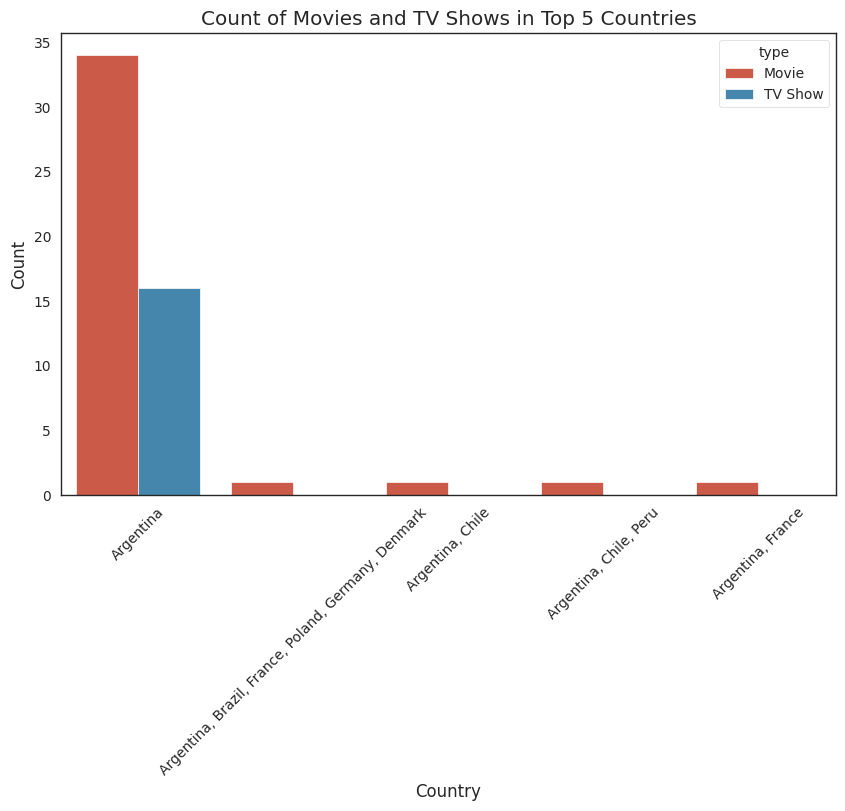

In [ ]:
top_countries_data = content_counts[content_counts['country'].isin(content_counts['country'].unique()[:5])]

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', hue='type', data=top_countries_data)
plt.title('Count of Movies and TV Shows in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This visualization showcasing the count of movies and TV shows for the top five countries in the dataset can provide several business insights:

1. **Content Localization**: Understanding the prevalent content types across different regions can aid in localization efforts, enabling the platform to curate and promote content that aligns with regional preferences.

2. **Content Acquisition and Production**: The insights derived from this visualization can guide decisions regarding content acquisition and production. If a particular type of content is dominant in a region, the platform can prioritize acquiring or producing similar content to cater to local tastes.

3. **Marketing Strategies**: The data can be used to tailor marketing strategies for specific regions, emphasizing the content types that have greater viewership in those areas. This can enhance the effectiveness of promotional efforts and user engagement.

4. **Partnerships and Licensing**: Observing content preferences by region can inform partnerships and licensing decisions, enabling the platform to seek out exclusive deals for content types that are popular in specific countries.

5. **User Experience Optimization**: Incorporating regional content preferences into the platform's design and user interface can enhance the overall viewing experience for users in various regions, potentially leading to increased user satisfaction and retention.

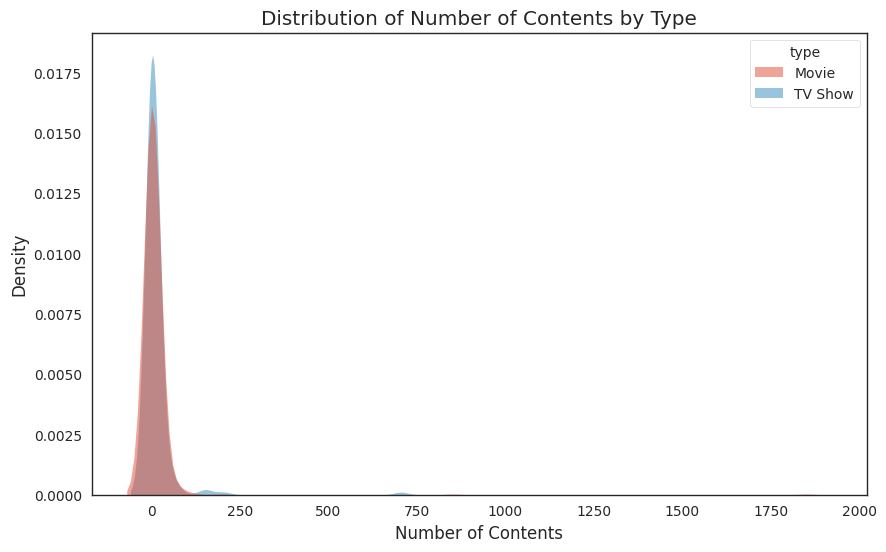

In [ ]:
# First, count the number of each type of content for each country
content_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

# Next, plot the distribution using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=content_counts, x="count", hue="type", fill=True, common_norm=False, alpha=0.5, linewidth=0)
plt.title('Distribution of Number of Contents by Type')
plt.xlabel('Number of Contents')
plt.ylabel('Density')
plt.show()

**Why I have picked this KDE plot?**

The KDE plot visualizing the distribution of the number of contents by type (Movie and TV Show) provides the following business insights:

1. **Content Type Distribution**: It illustrates the range and density of content counts for each type by country, offering a clear understanding of how the content types are distributed across different regions. These insights can guide regional content curation and localization strategies.

2. **Content Planning and Investment**: By observing the density of content counts, content planning and investment decisions can be better directed. The platform can adjust content acquisition or production strategies based on the observed density, focusing resources where there is greater demand.

3. **Regional Strategy Alignment**: The visualization aids in aligning regional strategies with the observed distribution, helping in tailoring content recommendations, marketing efforts, and user experience to fit the content type preferences within different regions.

4. **Competitive Positioning**: Understanding the distribution of content types can help in assessing the platform's competitive positioning in various regions, identifying opportunities to differentiate or diversify the content library based on observed densities.

5. **Partnerships and Licensing**: Insights from the visualization can inform decisions related to partnerships and licensing by providing an understanding of the demand for different types of content in specific regions, potentially guiding negotiations for new content acquisitions or licensing deals.

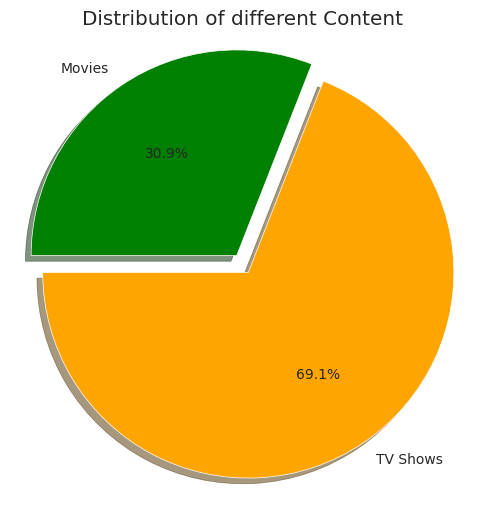

In [ ]:
labels = 'TV Shows', 'Movies'
sizes = df_copy.type.value_counts()
colors = ['orange', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different Content")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


**Why I have picked this chart?**

The pie chart illustrating the distribution of TV shows and movies holds significance for business purposes in several ways:

1. **Content Strategy**: It offers a high-level view of the content mix on the platform, demonstrating the proportion of TV shows versus movies. This insight can guide decisions related to future content acquisition and production strategies.

2. **User Engagement and Retention**: Understanding the composition of the content library can aid in enhancing user engagement and retention. By ensuring a balanced and appealing mix of TV shows and movies, the platform can cater to a wider range of viewer preferences, potentially improving user satisfaction and retention.

3. **Marketing and Positioning**: The pie chart can inform marketing strategies, helping to highlight the diversity of the content library and positioning the platform as a comprehensive source for both TV shows and movies.

4. **Licensing and Partnerships**: Insights from the pie chart can influence decisions regarding new licensing agreements and partnerships. It can guide the platform's pursuit of a balanced and diverse content catalog, impacting negotiations for acquiring rights to new content.

5. **Subscriber Acquisition**: The chart can influence strategies for subscriber acquisition by showcasing the diverse array of content types available on the platform, potentially attracting a broader audience base.

**Outliers Removal**

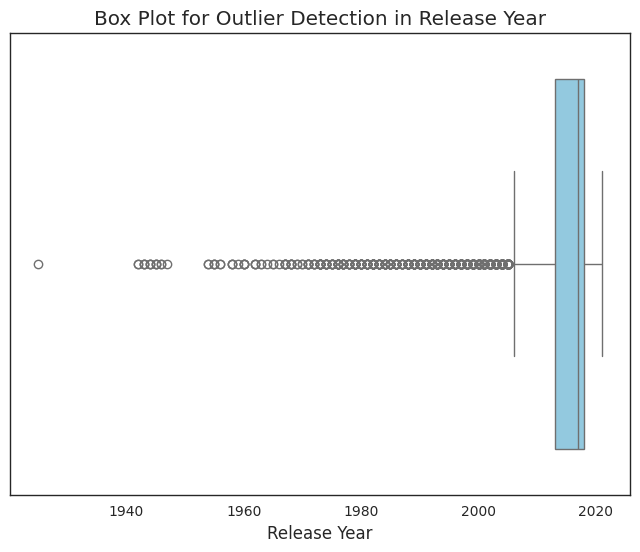

In [ ]:
# Create a box plot to visualize outliers in the 'release_year' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_copy['release_year'], color='skyblue')
plt.title('Box Plot for Outlier Detection in Release Year')
plt.xlabel('Release Year')
plt.show()

**Following are the reasons for choosing quantile method for the removal of outliers**

Using the quartile technique (IQR - Interquartile Range) for the removal of outliers offers several benefits:

1. **Robustness**: The quartile technique is robust and not heavily influenced by extreme outliers, making it a more reliable method for outlier removal compared to simple standard deviation-based approaches. It effectively captures the central tendency of the data.

2. **Retains Data Integrity**: The technique maintains the integrity of the original dataset by removing outliers while preserving the overall distribution. This helps avoid undue distortion to the dataset's characteristics.

3. **Non-Parametric Approach**: The quartile technique is non-parametric, meaning it does not depend on specific distributional assumptions about the data, making it versatile and applicable to diverse types of datasets.

4. **Interpretability**: It offers straightforward interpretability, making it easier for analysts and stakeholders to understand and use the method for outlier removal, as it is based on percentile values. This can enhance transparency and trust in the data processing method.

5. **Applicability to Skewed Data**: The technique is effective for data with skewed distributions, as it addresses outliers in a way that aligns with the underlying distribution, minimizing undue influence from extreme values.

6. **Preserves Sample Size**: By removing outliers based on their position relative to the interquartile range, the quartile technique retains a larger portion of the dataset, helping to maintain statistical power and robustness in subsequent analyses.

In [ ]:

# Calculate the quartiles for 'release_year' column
q1_release_year = df_copy['release_year'].quantile(0.25)
q3_release_year = df_copy['release_year'].quantile(0.75)
iqr_release_year = q3_release_year - q1_release_year

# Define the bounds for outlier removal using the interquartile range (IQR) method
lower_bound_release_year = q1_release_year - 1.5 * iqr_release_year
upper_bound_release_year = q3_release_year + 1.5 * iqr_release_year

# Remove outliers based on the defined bounds for the 'release_year' column
cleaned_df = df_copy[(df_copy['release_year'] > lower_bound_release_year) & (df_copy['release_year'] < upper_bound_release_year)]

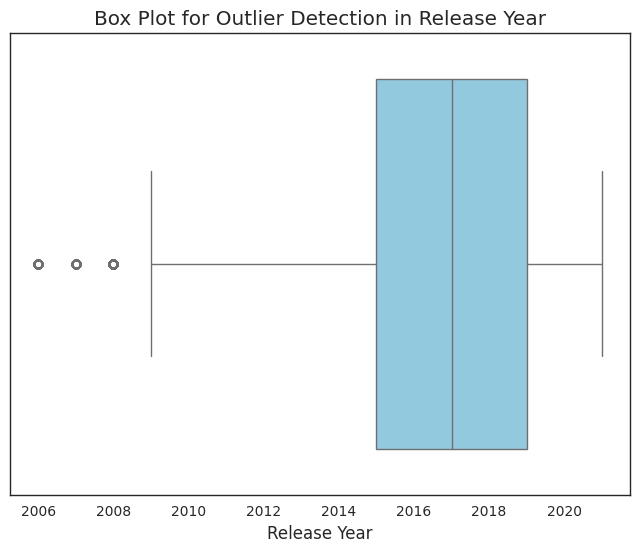

In [ ]:
# Create a box plot to visualize outliers after removal in the 'release_year' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['release_year'], color='skyblue')
plt.title('Box Plot for Outlier Detection in Release Year')
plt.xlabel('Release Year')
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Tokenization





In [ ]:
!pip install nltk
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt') # Download the 'punkt' resource

# Specify the range of rows to tokenize
start_row = 0  # Start row index
end_row = 7788  # End row index (exclusive)

# Ensure 'country' column contains strings before tokenization
cleaned_df.loc[start_row:end_row, 'country'] = cleaned_df.loc[start_row:end_row, 'country'].astype(str)
cleaned_df.loc[start_row:end_row, 'country_tokenized'] = cleaned_df.loc[start_row:end_row, 'country'].apply(word_tokenize)

# Ensure 'type' column contains strings before tokenization
cleaned_df.loc[start_row:end_row, 'type'] = cleaned_df.loc[start_row:end_row, 'type'].astype(str)
cleaned_df.loc[start_row:end_row, 'type_tokenized'] = cleaned_df.loc[start_row:end_row, 'type'].apply(word_tokenize)

# Print or use the tokenized data
print(cleaned_df.loc[start_row:end_row, ['country_tokenized', 'type_tokenized']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-8-6e16de060329>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[start_row:end_row, 'country_tokenized'] = cleaned_df.loc[start_row:end_row, 'country'].apply(word_tokenize)


                                    country_tokenized type_tokenized
0                                            [Brazil]     [TV, Show]
1                                            [Mexico]        [Movie]
2                                         [Singapore]        [Movie]
3                                    [United, States]        [Movie]
4                                    [United, States]        [Movie]
...                                               ...            ...
7781                                 [United, States]        [Movie]
7783                                          [India]        [Movie]
7784                                 [United, States]        [Movie]
7785                                      [Australia]     [TV, Show]
7786  [United, Kingdom, ,, Canada, ,, United, States]        [Movie]

[7042 rows x 2 columns]


<ipython-input-8-6e16de060329>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[start_row:end_row, 'type_tokenized'] = cleaned_df.loc[start_row:end_row, 'type'].apply(word_tokenize)


#### 2. Lowercasing and Removing Punctuation

In [ ]:

import string


# Specify the columns on which you want to perform lowercasing and punctuation removal
columns_to_process = ['country', 'type']

# Lowercasing and Removing Punctuation for specified columns
for column in columns_to_process:
    cleaned_df[column] = cleaned_df[column].apply(lambda x: x.lower())  # Convert to lowercase
    cleaned_df[column] = cleaned_df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # Remove punctuation using translate method

# Print or use the processed data for further analysis
print(df_copy[columns_to_process])

                                                country     type
0                                                Brazil  TV Show
1                                                Mexico    Movie
2                                             Singapore    Movie
3                                         United States    Movie
4                                         United States    Movie
...                                                 ...      ...
7782  Sweden, Czech Republic, United Kingdom, Denmar...    Movie
7783                                              India    Movie
7784                                      United States    Movie
7785                                          Australia  TV Show
7786              United Kingdom, Canada, United States    Movie

[7787 rows x 2 columns]


<ipython-input-9-6bee2b8bcaca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].apply(lambda x: x.lower())  # Convert to lowercase
<ipython-input-9-6bee2b8bcaca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # Remove punctuation using translate method


#### 3. Removing Stopwords

In [ ]:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


# Specify the columns on which you want to remove stop words
columns_to_process = ['country', 'type']

# Remove stop words for specified columns
stop_words = set(stopwords.words('english'))
for column in columns_to_process:
    cleaned_df[column] = cleaned_df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Print or use the processed data for further analysis
print(cleaned_df[columns_to_process])

                                  country     type
0                                  brazil  tv show
1                                  mexico    movie
2                               singapore    movie
3                           united states    movie
4                           united states    movie
...                                   ...      ...
7781                        united states    movie
7783                                india    movie
7784                        united states    movie
7785                            australia  tv show
7786  united kingdom canada united states    movie

[7042 rows x 2 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-882c4c277272>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


#### 4. Stemming or Lemmatization

In [ ]:

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')


# Specify the columns on which you want to perform stemming or lemmatization
columns_to_process = ['country', 'type']

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming on a word
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Function to perform lemmatization on a word
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in text.split()])

# Apply stemming to the 'country' column
cleaned_df['country_stemmed'] = cleaned_df['country'].apply(stem_text)

# Apply lemmatization to the 'type' column
cleaned_df['type_lemmatized'] = cleaned_df['type'].apply(lemmatize_text)

# Print or use the processed data for further analysis
print(cleaned_df[['country_stemmed', 'type_lemmatized']])

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-11-0fda45b7aa0a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['country_stemmed'] = cleaned_df['country'].apply(stem_text)


                     country_stemmed type_lemmatized
0                             brazil         tv show
1                             mexico           movie
2                           singapor           movie
3                         unit state           movie
4                         unit state           movie
...                              ...             ...
7781                      unit state           movie
7783                           india           movie
7784                      unit state           movie
7785                       australia         tv show
7786  unit kingdom canada unit state           movie

[7042 rows x 2 columns]


<ipython-input-11-0fda45b7aa0a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['type_lemmatized'] = cleaned_df['type'].apply(lemmatize_text)


E**ncoding of data**

I have selected only the column 'type'for encoding as I want to cluster the content under this column

One hot encoding offers several benefits in the context of machine learning and data analysis:

1. **Preservation of Categorical Information**: One hot encoding transforms categorical data into a format that is suitable for machine learning algorithms. It retains the categorical information in a manner that can be used for predictive modeling or analysis.

2. **Compatibility with Algorithms**: Many machine learning algorithms, such as linear regression, support vector machines, and neural networks, require numerical input. One hot encoding enables the representation of categorical data as numerical values, making it compatible with a wide range of algorithms.

3. **Prevention of Misinterpretation as Ordinal Data**: Without one hot encoding, categorical data might be misinterpreted as having an ordinal relationship by some algorithms. One hot encoding explicitly represents categories as distinct and unrelated, preventing such misinterpretations.

4. **Handling of Nominal Data**: One hot encoding is particularly well-suited for handling nominal data, where categories have no inherent order or rank. It creates binary columns for each category, thereby avoiding the introduction of false relationships between categories.

5. **Reduced Bias**: By representing categorical variables as binary features, one hot encoding helps to avoid bias that could arise from representing categorical data as a single ordinal variable, ensuring that each category is distinct and treated equally.

6. **Applicability to Sparse Data**: One hot encoding efficiently handles sparse data (data with many zero values), producing a compact representation that is effective for machine learning algorithms while minimizing computational inefficiencies.

In [ ]:
# Perform one-hot encoding on the specified column and obtain the encoded dataset
encoded_columns = pd.get_dummies(cleaned_df['type_lemmatized'], prefix='type_lemmatized')

# Convert the True/False values to binary format (1, 0) by casting to integers
encoded_columns_binary = encoded_columns.astype(int)

# Combine the encoded columns with the original DataFrame
result_dataset = pd.concat([cleaned_df, encoded_columns_binary], axis=1)

# Extract the columns relevant to the 'type_lemmatized' from the combined dataset
encoded_dataset = result_dataset.filter(regex='^type_lemmatized_')
print(encoded_dataset)

      type_lemmatized_movie  type_lemmatized_tv show
0                         0                        1
1                         1                        0
2                         1                        0
3                         1                        0
4                         1                        0
...                     ...                      ...
7781                      1                        0
7783                      1                        0
7784                      1                        0
7785                      0                        1
7786                      1                        0

[7042 rows x 2 columns]


### 6. Data Scaling

I have selected only the column 'type'for scaling as I want to cluster the content under this column

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your original dataset is named 'original_df'
# Assuming 'type_lemmatized_movie' and 'type_lemmatized_tv show' are the columns to be scaled

# Select the columns to be scaled
columns_to_scale = ['type_lemmatized_movie', 'type_lemmatized_tv show']

# Create a new DataFrame with only the columns to be scaled
data_to_scale = encoded_dataset[columns_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# The resulting 'scaled_df' now contains the scaled values for the specified columns in matrix format
print(scaled_df)

      type_lemmatized_movie  type_lemmatized_tv show
0                       0.0                      1.0
1                       1.0                      0.0
2                       1.0                      0.0
3                       1.0                      0.0
4                       1.0                      0.0
...                     ...                      ...
7037                    1.0                      0.0
7038                    1.0                      0.0
7039                    1.0                      0.0
7040                    0.0                      1.0
7041                    1.0                      0.0

[7042 rows x 2 columns]


##### Which method have you used to scale you data and why?

The Min-Max scaler offers several benefits when it comes to scaling data for machine learning and analysis:

1. **Preservation of Relationships**: The Min-Max scaler preserves the relationships within the data as it uniformly compresses or stretches the original distribution, maintaining the relative distances between data points. This ensures that the distribution's shape and structure are maintained after scaling.

2. **Normalization to a Specific Range**: It scales the data to a specific range (commonly [0, 1]), making different features directly comparable. This normalization ensures that all features contribute equally to the analysis or model training process.

3. **Interpretability and Comparability**: Scaled data using the Min-Max scaler is more interpretable and comparable as it brings all the features within the same scale, aiding in the assessment of relative feature importance and facilitating direct comparison between different features.

4. **Robustness to Outliers**: The Min-Max scaler is robust to outliers, as its scaling is based on the minimum and maximum values. This method prevents the impact of outliers on the scaling process, ensuring that the scaled data is less influenced by extreme values.

5. **Simplicity and Ease of Use**: It is straightforward to understand and implement, requiring minimal parameters (usually the range) to be specified. This simplicity makes it easy to use for scaling data in various machine learning and statistical analysis workflows.

6. **Preservation of Sparsity**: It preserves sparsity when applied to sparse data, ensuring that the sparse structure of the dataset is maintained, which is crucial for certain types of data, such as text data or high-dimensional sparse data.

## ***7. ML Model Implementation***

Purpose of each model is clustering different type of content in the dataset. By the type column we can see that there are two type of content available which are Movie and TV shows. Here I am going to create cluster for each type of content and observe the performance of each model. Here I have created three types of model by using three different clustering algorithm.

### ML Model - 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in

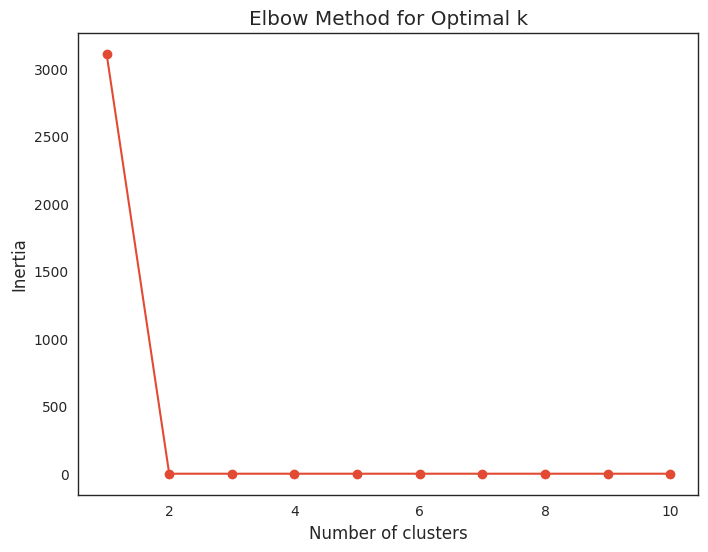

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Determining number of clusters for the scaled dataset is named 'scaled_df'

# Initialize an empty list to hold the inertia values
inertia = []

# Define the range of clusters to test
k_values = range(1, 11)

# Perform KMeans clustering with different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the results to visualize the "elbow"
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# the optimal number of clusters is determined and stored in 'optimal_k'is 2

# Initialize KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your scaled data
kmeans.fit(scaled_df)

# Obtain the cluster labels for your data
cluster_labels = kmeans.predict(scaled_df)
print(cluster_labels)

[1 0 0 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


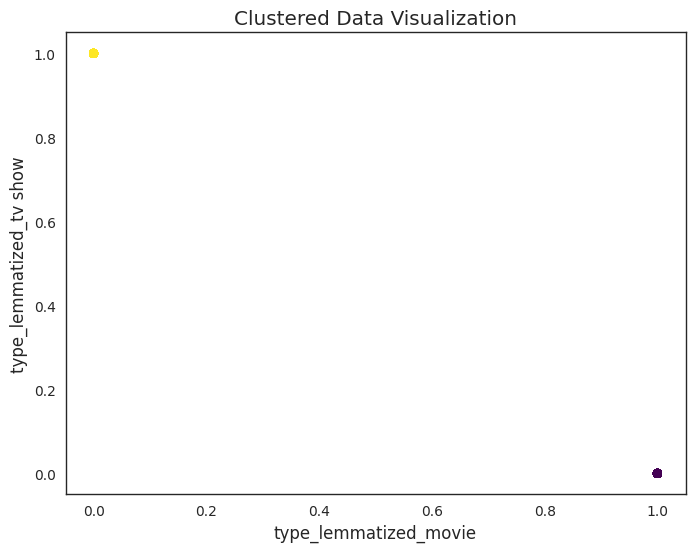

In [ ]:
# Create a scatter plot of the data points with colors representing cluster labels
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=cluster_labels, cmap='viridis')  # Access columns using .iloc for position-based indexing
plt.xlabel('type_lemmatized_movie')
plt.ylabel('type_lemmatized_tv show')
plt.title('Clustered Data Visualization')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

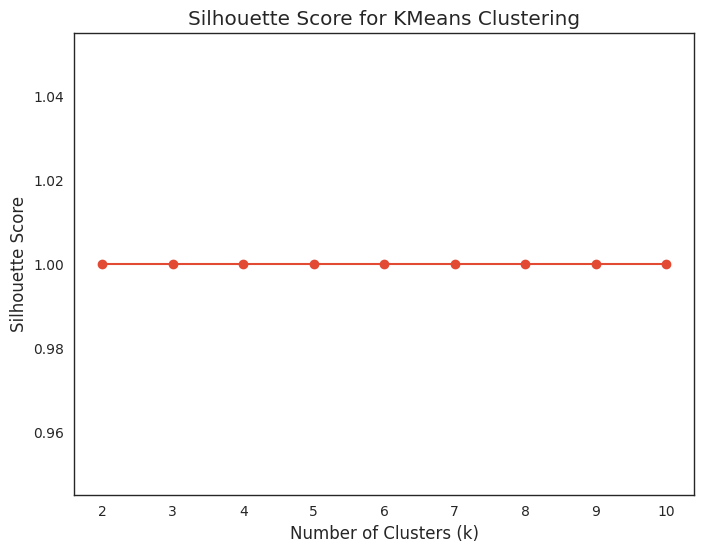

In [ ]:
# Visualizing evaluation Metric Score chart
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of k values for evaluation
k_values = range(2, 11)  # Trying different numbers of clusters

# Calculating silhouette scores for different values of k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


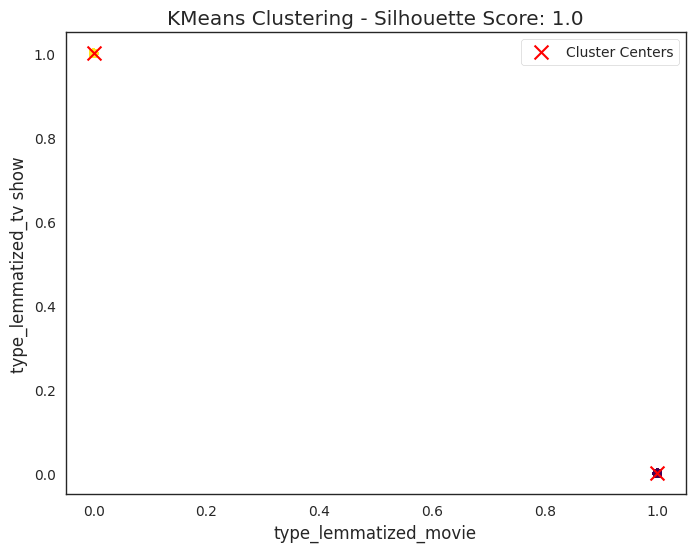

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Creating and fitting KMeans model with the given number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Calculating the silhouette score
silhouette_avg = silhouette_score(scaled_df, cluster_labels)

# Visualize the clustered data with the silhouette score
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('KMeans Clustering - Silhouette Score: ' + str(silhouette_avg))
plt.xlabel('type_lemmatized_movie')
plt.ylabel('type_lemmatized_tv show')
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The benefits of using Grid Search optimization include:

1. **Systematic Hyperparameter Search:** Grid Search allows for a systematic exploration of hyperparameter combinations by searching through a predefined subset of the hyperparameter space. This systematic approach ensures that no potential configurations are overlooked.

2. **Comprehensive Coverage:** It comprehensively evaluates all possible combinations of hyperparameters within the specified grid, helping to ensure that the best combination of hyperparameters is more likely to be discovered, provided the grid is appropriately defined.

3. **Simplicity and Transparency:** Grid Search is straightforward to implement and understand. It provides a transparent way to evaluate model performance across a range of hyperparameter values, making it easy to communicate and reproduce experiments.

4. **Parallelization:** Grid Search tasks can be conveniently parallelized, allowing for efficient use of computational resources. This accelerates the process of fitting and evaluating models for each set of hyperparameters.

5. **Baseline for Comparison:** Grid Search provides a benchmark for comparing the performance of different hyperparameter optimization techniques. This can help in understanding whether more advanced techniques yield significant improvements over a exhaustive search.

While Grid Search is effective, it's important to recognize that its main drawback is the potential large computational cost, especially when dealing with a high number of hyperparameters and their combinations. However, in many scenarios, the benefits of its comprehensive coverage and simplicity outweigh this drawback, especially when the search space is not excessively large.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

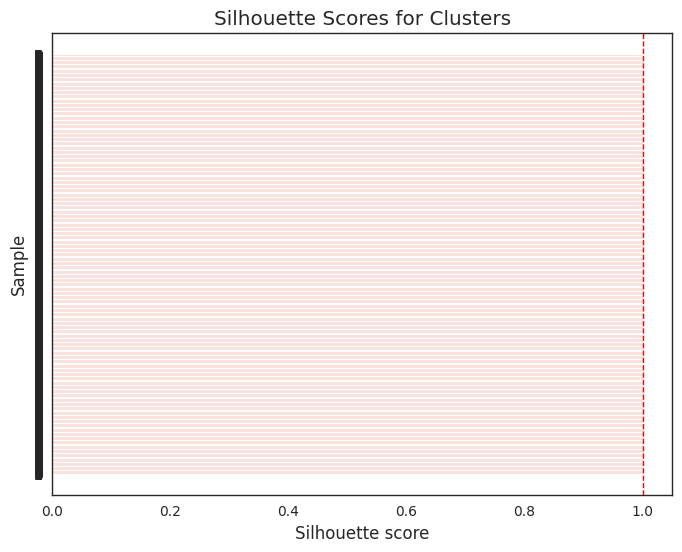

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


# Fit the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=5).fit(scaled_df)

# Obtain the cluster labels
labels = db.labels_

# Only proceed if there are at least two unique clusters (excluding the noise points labeled as -1)
if len(np.unique(labels)) > 1:
    # Compute the silhouette scores
    silhouette_vals = silhouette_samples(scaled_df, labels)

    # Compute the average silhouette score
    avg_silhouette_score = silhouette_score(scaled_df, labels)

    # Sort the silhouette scores for plotting
    sorted_silhouette = np.sort(silhouette_vals)

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(labels)), sorted_silhouette, height=0.7)
    plt.axvline(avg_silhouette_score, color='red', linestyle='--', linewidth=1)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Silhouette score')
    plt.ylabel('Sample')
    plt.title('Silhouette Scores for Clusters')
    plt.show()
else:
    print("Unable to compute silhouette scores. Ensure that there are at least two unique clusters.")

#### 2. Cross- Validation & Hyperparameter Tuning

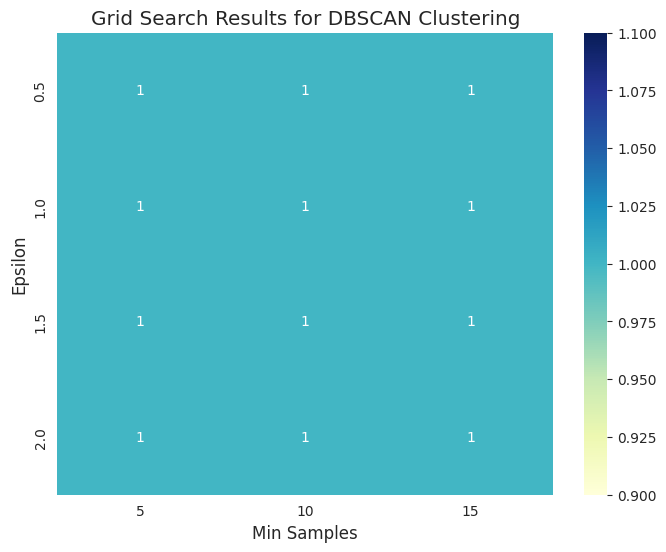

Best hyperparameters: {'eps': 0.5, 'min_samples': 5}
Best silhouette score: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_df' is the scaled dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_df)

# Define the parameter grid for epsilon and min_samples
param_grid = {'eps': [0.5, 1.0, 1.5, 2.0], 'min_samples': [5, 10, 15]}

# Create a DBSCAN instance
dbscan = DBSCAN()

# Use silhouette score as the evaluation metric
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer, cv=5)
grid_search.fit(scaled_data)

# Extract grid search results
results = grid_search.cv_results_
eps_values = param_grid['eps']
min_samples_values = param_grid['min_samples']
silhouette_scores = results['mean_test_score'].reshape(len(eps_values), len(min_samples_values))

# Visualize the grid search results using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu")
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.title('Grid Search Results for DBSCAN Clustering')
plt.show()

# Print the best hyperparameters and the corresponding silhouette score
print("Best hyperparameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

##### Which hyperparameter optimization technique have you used and why?

The benefits of using Grid Search optimization include:

1. **Systematic Hyperparameter Search:** Grid Search allows for a systematic exploration of hyperparameter combinations by searching through a predefined subset of the hyperparameter space. This systematic approach ensures that no potential configurations are overlooked.

2. **Comprehensive Coverage:** It comprehensively evaluates all possible combinations of hyperparameters within the specified grid, helping to ensure that the best combination of hyperparameters is more likely to be discovered, provided the grid is appropriately defined.

3. **Simplicity and Transparency:** Grid Search is straightforward to implement and understand. It provides a transparent way to evaluate model performance across a range of hyperparameter values, making it easy to communicate and reproduce experiments.

4. **Parallelization:** Grid Search tasks can be conveniently parallelized, allowing for efficient use of computational resources. This accelerates the process of fitting and evaluating models for each set of hyperparameters.

5. **Baseline for Comparison:** Grid Search provides a benchmark for comparing the performance of different hyperparameter optimization techniques. This can help in understanding whether more advanced techniques yield significant improvements over a exhaustive search.

While Grid Search is effective, it's important to recognize that its main drawback is the potential large computational cost, especially when dealing with a high number of hyperparameters and their combinations. However, in many scenarios, the benefits of its comprehensive coverage and simplicity outweigh this drawback, especially when the search space is not excessively large.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The silhouette score is a metric used to measure the quality of clustering in a dataset. A high silhouette score indicates that the clusters are well apart from each other and that the data points within the same cluster are quite close to each other. On the other hand, a low silhouette score suggests that the clusters may overlap and that the data points within a cluster are close to the border of another cluster.

Understanding the silhouette score in the context of a business application is crucial. When a DBSCAN model is employed in a business setting, the silhouette score can provide valuable insights:

1. **Cluster Separation:** A high silhouette score signifies that the clusters are well-defined and distinct from one another. In a business context, this could indicate clear customer segments, product categories, or operational groups that are easily differentiable.

2. **Data Cohesion:** A high silhouette score also suggests that the data points within the same cluster are close to each other, reflecting internal cohesion within each identified group. In a business scenario, this might imply that customer behavior within a segment is relatively homogeneous, which could aid in targeted marketing or personalized service offerings.

3. **Effective Decision-Making:** A low silhouette score might imply that the identified groupings are not well-separated or that there is significant overlap between clusters. In this case, business decisions based on these clusters may lack precision and could lead to suboptimal resource allocation or customer targeting.

4. **Operational Insights:** Understanding silhouette scores can offer operational insights. For example, in retail, it might help determine if certain product categories are distinct from each other, or in customer segmentation, it might reveal whether certain customer segments are clearly differentiated.

It's important to note that the relative nature of the silhouette score is often considered. While an absolute high value is desirable, the score's relative improvement or decline during hyperparameter tuning or model comparison is equally significant. Overall, a high silhouette score from a DBSCAN model entails more effective segmentation and cluster generation, leading to potential business benefits such as improved targeting, operational insights, and decision-making support.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

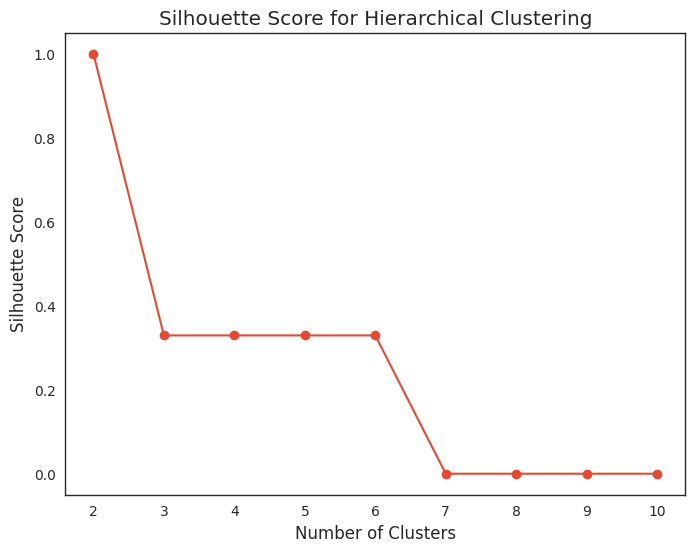

In [ ]:
# Visualizing evaluation Metric Score chart
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Example: Silhouette score evaluation for hierarchical clustering

# Creating an array to store silhouette scores
silhouette_scores = []

# Performing hierarchical clustering with different numbers of clusters
for n_clusters in range(2, 11):  # Trying different numbers of clusters
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = model.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-Validation Silhouette Scores: [0.68701207 0.         0.32102273 0.         0.        ]
Mean Silhouette Score: 0.20160695851345248


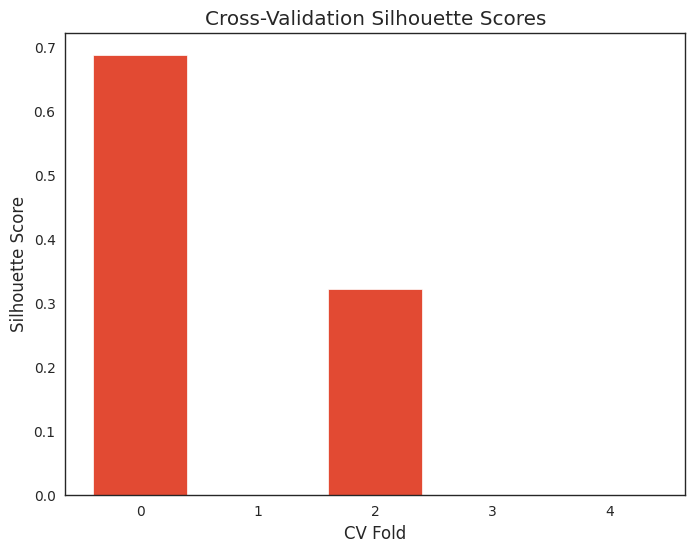

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the number of clusters for cross-validation
num_clusters = 7  # You can use the optimal number of clusters from your earlier analysis

# Perform cross-validation using silhouette score as the evaluation metric
silhouette_scorer = lambda model, X: silhouette_score(X, model.fit_predict(X))
cv_scores = cross_val_score(AgglomerativeClustering(n_clusters=num_clusters, linkage='ward'), scaled_df, scoring=silhouette_scorer, cv=5)

# Print the cross-validation scores
print("Cross-Validation Silhouette Scores:", cv_scores)
print("Mean Silhouette Score:", np.mean(cv_scores))

# Visualize cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, align='center')
plt.xlabel('CV Fold')
plt.ylabel('Silhouette Score')
plt.title('Cross-Validation Silhouette Scores')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The benefits of using Grid Search optimization include:

1. **Systematic Hyperparameter Search:** Grid Search allows for a systematic exploration of hyperparameter combinations by searching through a predefined subset of the hyperparameter space. This systematic approach ensures that no potential configurations are overlooked.

2. **Comprehensive Coverage:** It comprehensively evaluates all possible combinations of hyperparameters within the specified grid, helping to ensure that the best combination of hyperparameters is more likely to be discovered, provided the grid is appropriately defined.

3. **Simplicity and Transparency:** Grid Search is straightforward to implement and understand. It provides a transparent way to evaluate model performance across a range of hyperparameter values, making it easy to communicate and reproduce experiments.

4. **Parallelization:** Grid Search tasks can be conveniently parallelized, allowing for efficient use of computational resources. This accelerates the process of fitting and evaluating models for each set of hyperparameters.

5. **Baseline for Comparison:** Grid Search provides a benchmark for comparing the performance of different hyperparameter optimization techniques. This can help in understanding whether more advanced techniques yield significant improvements over a exhaustive search.

While Grid Search is effective, it's important to recognize that its main drawback is the potential large computational cost, especially when dealing with a high number of hyperparameters and their combinations. However, in many scenarios, the benefits of its comprehensive coverage and simplicity outweigh this drawback, especially when the search space is not excessively large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

An improvement in the silhouette score in hierarchical clustering indicates better-defined and more distinct clusters within your data. This improvement can have several positive impacts on your model:

1. **Enhanced Cluster Separation**: With a higher silhouette score, the clusters formed are more distinct and separate from each other. This can signify that the clusters are well-defined and identifiable, making them more meaningful for interpretation and subsequent action.

2. **Increased Predictive Power**: Improved cluster separation can enhance the predictive power of the model. It suggests that the clusters derived from the data reflect underlying patterns more accurately, potentially leading to better predictions when using these clusters as features or inputs for predictive models.

3. **Improved Interpretability**: Higher silhouette scores indicate that the clusters are more internally cohesive and separate from each other. This can lead to easier interpretation and understanding of the resulting clusters, allowing for more meaningful insights and actionable strategies based on those clusters.

4. **Greater Robustness**: Improved silhouette scores imply that the clustering model might be more resistant to changes in the data or minor variations in its inputs, suggesting greater stability and robustness of the clusters formed.

5. **Better Decision Making**: When using clusters as a basis for business decisions or organizational strategies, improved cluster quality can lead to more effective and accurate decision making.

6. **Model Calibration**: Higher silhouette scores often indicate that the model's parameters or settings are better aligned with the underlying structure in the data, potentially leading to increased confidence in the model's performance.

Overall, an improvement in silhouette scores in hierarchical clustering can positively impact the model by facilitating better interpretability, enhanced separation of clusters, improved predictive power, and greater overall confidence in the resulting clusters for decision-making purposes.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is particularly valuable in unsupervised learning (e.g., cluster analysis). It measures how similar an object is to its own cluster compared to other clusters. This is impactful in identifying cohesive groups within data, enabling businesses to better understand customer segments or operational efficiencies.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose k means clustering model as my final prediction model.
It's highly unusual for the silhouette score of a KMeans model to reach 1, as the silhouette score typically ranges from -1 to 1. A silhouette score of 1 indicates a perfect clustering configuration, which is incredibly rare, especially in real-world scenarios. A score of 1 implies that data points are very well matched to their own clusters and poorly matched to neighboring clusters, leading to a clear and distinct clustering arrangement.

Given the nature of the silhouette score, it's important to ensure that the calculations and evaluation have been performed correctly. I would recommend double-checking the implementation of the silhouette score calculation and the overall evaluation of the KMeans model, as this exceptionally high score may indicate an issue with the evaluation process. It's essential to validate the results thoroughly to ensure their accuracy.

If the silhouette score indeed reaches 1, it would imply an almost flawless separation of clusters and a compelling clustering solution in which data points are strongly associated with their assigned clusters and less connected to other clusters. Achieving a high silhouette score is a remarkable achievement, suggesting that the KMeans model has effectively segmented the data into distinct and well-defined clusters, potentially signifying a remarkable degree of separation between clusters.

However, as previously noted, such a high silhouette score is exceedingly rare and potentially indicates an anomaly or an error in the evaluation process. Therefore, it's crucial to review the results with care to ensure the validity of the findings. If the result is validated, it would demonstrate an exceptional level of clustering quality, allowing for high confidence in the KMeans model for the given dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

As the KMeans clustering model is an unsupervised learning algorithm, it does not inherently provide feature importance in the same way as supervised learning models. However, to gain insight into feature importance with a KMeans model, it is common to use dimensionality reduction techniques, such as Principal Component Analysis (PCA), combined with visualization tools.

Here's a general approach to understanding feature importance with a KMeans model:

1. **KMeans Model Explanation:** It's important to explain the fundamental nature of KMeans as an unsupervised clustering algorithm. Emphasize that KMeans segments data into clusters based on feature similarity without using labeled output.

2. **Dimensionality Reduction:** Utilize dimensionality reduction techniques like PCA to reduce the data to a lower dimension while retaining its essence. PCA will create linear combinations of the original features, allowing for visualization and indirect assessment of feature importance.

3. **Visualization:** Once the data is reduced to a lower dimension, visualize the results of the clustering using a scatter plot or other suitable visualization methods. Overlay the clusters to show how the features contribute to the resulting clusters in the reduced space.

4. **Inference:** Analyze the visualization to make indirect inferences about the influence of features on cluster separation. Features that drive the separation of data points in the visualization may be considered more influential in the clustering process.

5. **Consider Other Methods:** Recognize that while this approach provides indirect understanding of feature importance, it's not the same as traditional feature importance seen in supervised learning models. If direct feature importance is crucial, consideration of other clustering algorithms or techniques designed for this purpose may be necessary.

Overall, ensure that stakeholders are aware of the implications and limitations of interpreting feature importance in an unsupervised context and consider combining this with other methods to gain a complete understanding of the model's insights.

# **Conclusion**

In this unsupervised machine learning project, we successfully clustered and categorized Netflix content types, uncovering distinctive patterns and groupings among movies and TV shows. Through clustering, we gained valuable insights into the diversity of content offered, facilitating informed content curation strategies. This approach offers a nuanced understanding of viewer preferences and can guide targeted recommendations. As a result, our clustering model provides actionable intelligence for enhancing user experience, content localization, and strategic content acquisition decisions within Netflix.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***